In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


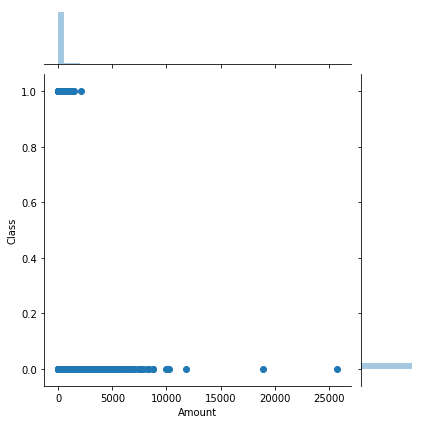

In [4]:
sns.jointplot(df['Amount'],df['Class'])

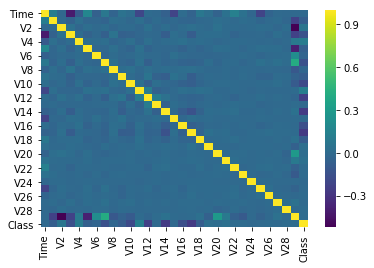

In [5]:
sns.heatmap(df.corr(),cmap='viridis')

In [6]:
X=df.drop('Class',axis=1)
y=df['Class']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt=DecisionTreeClassifier()

In [11]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
pred=dt.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [14]:
print(classification_report(y_test,pred))
print('\n\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67274
           1       0.66      0.72      0.69        94

    accuracy                           1.00     67368
   macro avg       0.83      0.86      0.84     67368
weighted avg       1.00      1.00      1.00     67368




[[67239    35]
 [   26    68]]


accuracy is -->  99.91


In [15]:
from sklearn.ensemble import RandomForestClassifier,IsolationForest

In [16]:
rf=RandomForestClassifier(n_estimators=100)

In [17]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
pred=rf.predict(X_test)

In [20]:
print(classification_report(y_test,pred))
print('\n\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67274
           1       0.96      0.72      0.82        94

    accuracy                           1.00     67368
   macro avg       0.98      0.86      0.91     67368
weighted avg       1.00      1.00      1.00     67368




[[67271     3]
 [   26    68]]


accuracy is -->  99.96


In [21]:
# a random sample from input data
xt=[[0,-1.359807134,-0.072781173,2.536346738,1.378155224,-0.33832077,0.462387778,0.239598554,0.098697901,0.36378697,0.090794172,-0.551599533,-0.617800856,-0.991389847,-0.311169354,1.468176972,-0.470400525,0.207971242,0.02579058,0.40399296,0.251412098,-0.018306778,0.277837576,-0.11047391,0.066928075,0.128539358,-0.189114844,0.133558377,-0.021053053,149.62]]
print(rf.predict(xt))

[0]
